### Pendeteksi Kebakaran menggunakan CNN

1. Instal depedensi yang dibutuhkan

In [5]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install tensorflow-gpu

  Using cached tensorflow_gpu-2.10.1-cp310-cp310-win_amd64.whl (455.9 MB)
     ---------------------------------------- 1.5/1.5 MB 255.3 kB/s eta 0:00:00
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
     ---------------------------------------- 2.6/2.6 MB 176.5 kB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 3.7/3.7 MB 243.7 kB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 136.6 kB/s eta 0:00:00
  Using cached flatbuffers-22.12.6-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
     ------------------------------------ 895.7/895.7 kB 643.9 kB/s eta 0:00:00
     --------------------------------------- 42.6/42.6 kB 86.2 kB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Using cached google_pasta-0.2.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
%pip install tensorflow


  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
     ---------------------------------------- 266.3/266.3 MB ? eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.10.1 requires keras<2.11,>=2.10.0, but you have keras 2.11.0 which is incompatible.
tensorflow-gpu 2.10.1 requires tensorboard<2.11,>=2.10, but you have tensorboard 2.11.0 which is incompatible.
tensorflow-gpu 2.10.1 requires tensorflow-estimator<2.11,>=2.10.0, but you have tensorflow-estimator 2.11.0 which is incompatible.


  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successfully uninstalled tensorflow-estimator-2.10.0
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1


In [10]:
%pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
Note: you may need to restart the kernel to use updated packages.


Import library yang akan diguanakan

In [1]:
import tensorflow as tf
import os

setup GPU untuk training

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

### 2. Data Cleaning

import library yang digunankan

In [109]:
import cv2
import imghdr

mengambil dataset

In [110]:
data_dir = 'data' 

format dataset yang digunakan

In [111]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

membaca data gambar sesuai format, dan menghapus gambar yang tidak terbaaca

In [112]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Gambar tidak berada pada dataset {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Gambar bermasalah {}'.format(image_path))

### Mempersiapkan model data Training

import library yang dibutuhkan

In [113]:
import numpy as np
from matplotlib import pyplot as plt

membaca data berdasarkan folder

In [114]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 977 files belonging to 2 classes.


transformasi data kedalam matriks

In [115]:
data_iterator = data.as_numpy_iterator()

Data disimpan dalam bentuk batch matriks

In [116]:
batch = data_iterator.next()

kita bisa melihat data pada batch matriks sebagai berikut

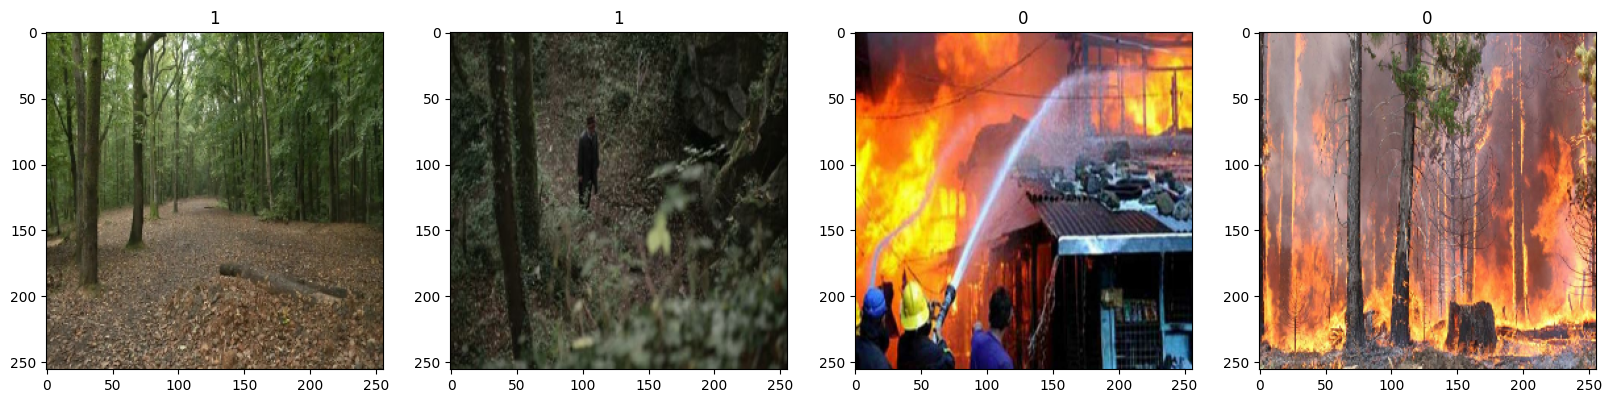

In [117]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

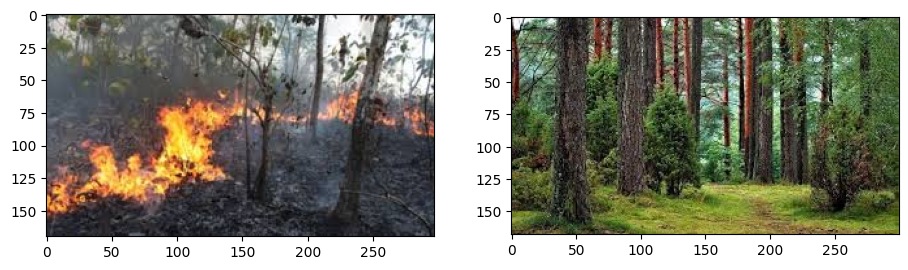

In [118]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from PIL import ImageTk, Image 

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8
# D:\Tubes ML\Forest-Fire-Detection-System-Using-CNN-\KEBAKARAN\data\fire_images\fire.8.png
# read images
img_A = Image.open('test1.jpeg')
img_B = Image.open('test2.jpeg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
plt.show()

# plt.title("Geeks 4 Geeks")
# plt.imshow(img_A)

### Transformasi data

data gambar berupa matriks akan diubah kedalam dengan skala 255 bit. x untuk file gambar dan y untuk label gambar (1/0) (1 : tidak ada kebakaran, 0 : ada kebakaran)

In [119]:
data = data.map(lambda x,y: (x/255, y))

Data yang telah diseragamkan (scaling), diubah kedalam bentuk matriks

In [120]:
data.as_numpy_iterator().next()

(array([[[[0.08509497, 0.12431066, 0.16352634],
          [0.08963255, 0.12884824, 0.16806392],
          [0.09422255, 0.13343823, 0.17265391],
          ...,
          [0.11245871, 0.12983003, 0.15224119],
          [0.12297827, 0.13474298, 0.15435082],
          [0.05847679, 0.0702415 , 0.08984935]],
 
         [[0.11347893, 0.15269461, 0.1919103 ],
          [0.09680933, 0.13602501, 0.1752407 ],
          [0.08406097, 0.12327665, 0.16249233],
          ...,
          [0.06479516, 0.08216649, 0.10457764],
          [0.05261933, 0.06438404, 0.08399189],
          [0.0203873 , 0.032152  , 0.05175985]],
 
         [[0.1004902 , 0.13970588, 0.17892157],
          [0.0925012 , 0.13171689, 0.17093258],
          [0.0913623 , 0.13057798, 0.16979367],
          ...,
          [0.06160021, 0.07897153, 0.10138269],
          [0.02986399, 0.0416287 , 0.06123654],
          [0.02623815, 0.03800285, 0.05761069]],
 
         ...,
 
         [[0.01781556, 0.03742341, 0.06095282],
          [0.02208

### Spliting data

data akan dibagi menjadi 2 buah bagian, 70% untuk training, 20% untuk validasi, dan 10% untuk testing

In [121]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

dalam dataset ini , sebanyak 21 batch digunakn untuk training, 6 untuk validasi, dan 3 untuk pengujian

In [122]:
print(train_size, val_size, test_size)

21 6 3


value dari data tersebut disimpan untuk proses building machine learning

In [123]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Building ML

kita akan menggunakan CNN model skuensial dengan depedensi library sebagai berikut

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model sekuensial dipilih untuk melakukan iterasi secara berurutan , hal ini sesusai dengan perpindahan layer pada CNN

In [125]:
model = Sequential()

selanjutnya data akan diteraining pada 3 layer Relu untuk mendapatkan fully connected layer. aktifasi sigmoid digunakan karena rentang nilai berkisar dari 1-0 (2 class : kebakaran dan tidak kebakaran)

In [126]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

menggunaan model adam untuk melihat dan meningkatkan akurasi matriks 

In [127]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model CNN yang akan di training adalah sebagai berikut

In [128]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

### Training model

log digunakn untuk melihat nilai error dan nilai ekurasi setiap epoch (train iterasi)

In [129]:
logdir='logs'

memanggil fungsi training callbacks

In [130]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

fungsi digunkan untuk iterasi data sebanyak 20 epoksi

In [131]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
21/21 [==============================] - 81s 3s/step - loss: 0.5599 - accuracy: 0.7902 - val_loss: 0.2123 - val_accuracy: 0.9115
Epoch 2/20
21/21 [==============================] - 50s 2s/step - loss: 0.2139 - accuracy: 0.9122 - val_loss: 0.1839 - val_accuracy: 0.9167
Epoch 3/20
21/21 [==============================] - 55s 3s/step - loss: 0.1474 - accuracy: 0.9479 - val_loss: 0.1042 - val_accuracy: 0.9635
Epoch 4/20
21/21 [==============================] - 46s 2s/step - loss: 0.1147 - accuracy: 0.9524 - val_loss: 0.0940 - val_accuracy: 0.9635
Epoch 5/20
21/21 [==============================] - 45s 2s/step - loss: 0.1057 - accuracy: 0.9643 - val_loss: 0.1264 - val_accuracy: 0.9635
Epoch 6/20
21/21 [==============================] - 47s 2s/step - loss: 0.0788 - accuracy: 0.9688 - val_loss: 0.1003 - val_accuracy: 0.9531
Epoch 7/20
21/21 [==============================] - 43s 2s/step - loss: 0.0797 - accuracy: 0.9613 - val_loss: 0.0909 - val_accuracy: 0.9635
Epoch 8/20
21/21 [==

### Pengukuran akurasi

Hasil 20 iterasi menurunkan tingkat error secara bertahap

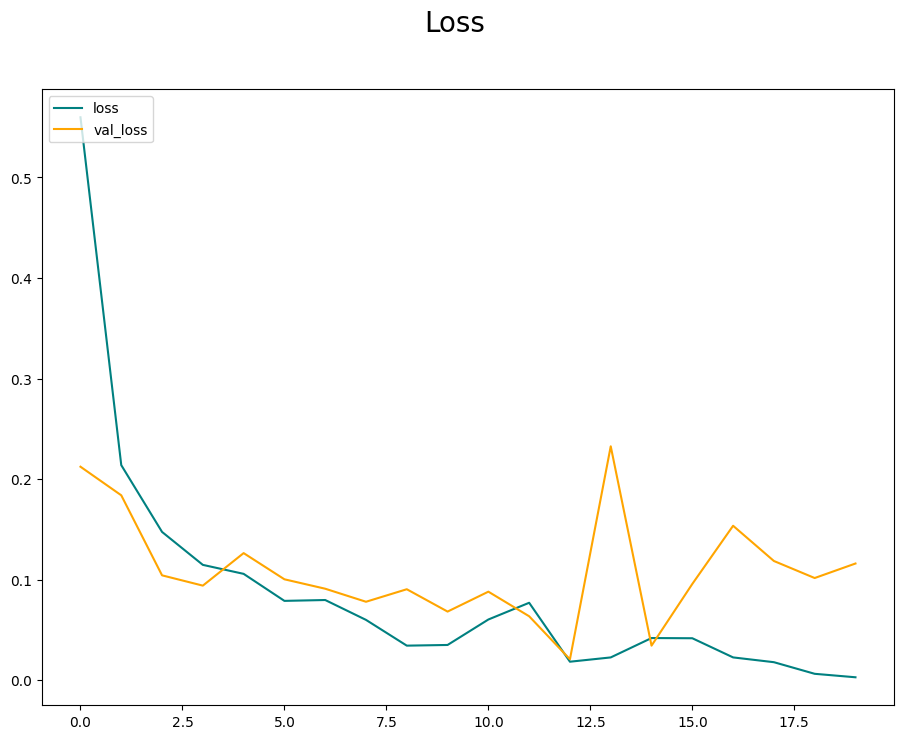

In [132]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Nilai akurasi berbanding terbalik dari nilai error

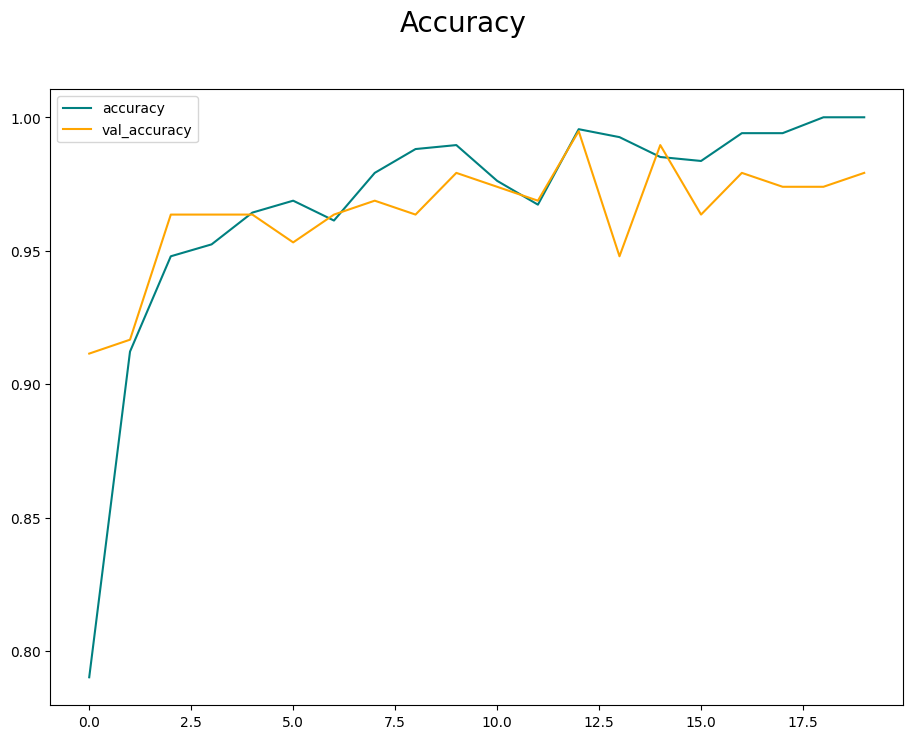

In [133]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluasi

evaluasi dilakukan menggunakan precision dan recall, serta akurasi

In [134]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, TruePositives, FalsePositives, TrueNegatives, FalseNegatives

memanggil fungsi 

In [135]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
tp = TruePositives()
fp = FalsePositives()
fn = FalseNegatives()
tn = TrueNegatives()

melakukan evaluasi dari data testing 

In [136]:
conf = []
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    conf = tf.math.confusion_matrix(y, yhat)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    tp.update_state(y,yhat)
    fp.update_state(y,yhat)
    fn.update_state(y,yhat)
    tn.update_state(y,yhat)

1/1 [==============================] - 0s 304ms/step


hasil presisi, recall, dan akurasi dari model

In [137]:
# print(pre.result(), re.result(), acc.result())
precision = pre.result()
recall = re.result()
accuracy = acc.result()
tf.print('Precission = ',precision)
tf.print('Recall = ',recall)
tf.print('Accuracy = ',accuracy)

tf.print(conf)

Precission =  1
Recall =  0.941176474
Accuracy =  0.989583313
[[28 0]
 [4 0]]


In [138]:
print('TP = ', tp.result().numpy())
print('FP = ', fp.result().numpy())
print('FN = ', fn.result().numpy())
print('TN = ', tn.result().numpy())

TP =  16.0
FP =  0.0
FN =  1.0
TN =  79.0


# 10. Testing 

mengimport libary yang dibutuhkan

In [145]:
import cv2

Memuat gambar

test1.jpeg : test hutan kebakaran <br>test2.jpeg : hutan tidak kebakaran

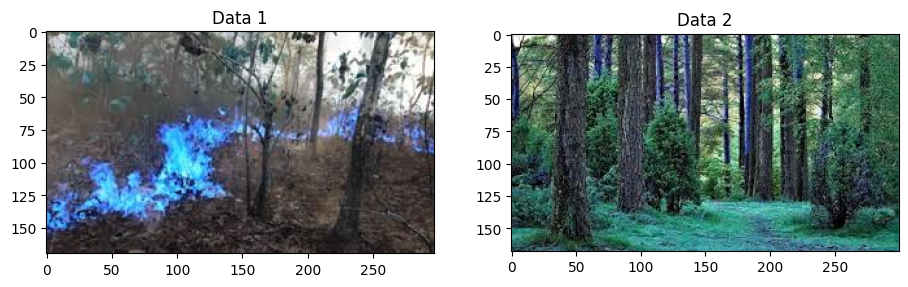

In [168]:
img1 = cv2.imread('test1.jpeg')
img2 = cv2.imread('test2.jpeg')

plt.subplot(2,2,1)
plt.title('Data 1')
plt.imshow(img1)

plt.subplot(2,2,2)
plt.title('Data 2')
plt.imshow(img2)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
plt.show()

In [164]:
img2.shape

(168, 300, 3)

In [152]:
from PIL import Image
from numpy import array

ar = array(img)
ar

array([[[ 83,  99,  88],
        [ 83,  99,  88],
        [ 79,  94,  87],
        ...,
        [ 98, 117, 115],
        [148, 167, 165],
        [168, 184, 183]],

       [[ 78,  94,  83],
        [ 89, 105,  94],
        [ 91, 106,  99],
        ...,
        [103, 122, 120],
        [125, 144, 142],
        [153, 169, 168]],

       [[ 94, 107,  97],
        [ 92, 105,  95],
        [108, 121, 114],
        ...,
        [ 90, 106, 106],
        [ 91, 107, 107],
        [ 90, 104, 104]],

       ...,

       [[ 34,  34,  42],
        [ 42,  42,  50],
        [ 45,  45,  53],
        ...,
        [ 11,  14,  21],
        [ 45,  48,  55],
        [ 50,  53,  60]],

       [[ 36,  36,  44],
        [ 45,  45,  53],
        [ 45,  45,  53],
        ...,
        [  9,  12,  19],
        [ 27,  30,  37],
        [ 44,  47,  52]],

       [[ 36,  36,  44],
        [ 45,  45,  53],
        [ 45,  45,  53],
        ...,
        [  9,  12,  19],
        [ 27,  30,  37],
        [ 44,  47,  52]]

transformasi dimensi gambar agar sesuai dengann model

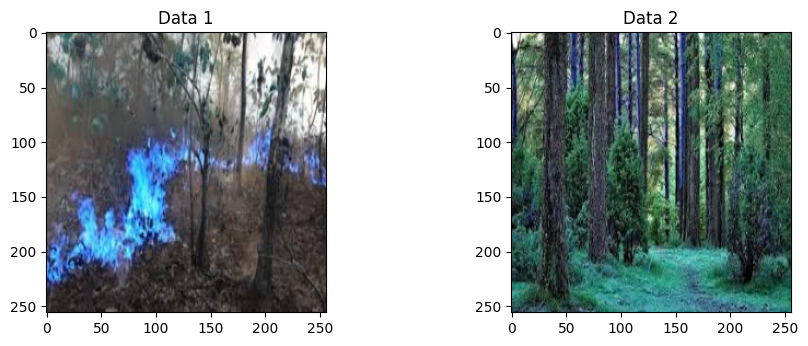

In [176]:
# resize = tf.image.resize(img, (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

plt.subplot(2,2,1)
plt.title('Data 1')
resize1 = tf.image.resize(img1, (256,256))
res = resize1.numpy().astype(int)
plt.imshow(res)

plt.subplot(2,2,2)
plt.title('Data 2')
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [177]:
ar_re = array(resize1)
ar_re

array([[[ 88.      ,  99.      ,  83.      ],
        [ 87.759766,  97.79883 ,  82.03906 ],
        [ 85.39844 ,  92.39844 ,  77.39844 ],
        ...,
        [119.00391 , 120.603516, 101.203125],
        [152.98828 , 154.98828 , 135.98828 ],
        [181.5586  , 182.63867 , 166.39844 ]],

       [[ 85.95652 ,  96.95652 ,  80.95652 ],
        [ 91.4514  , 101.49046 ,  85.7307  ],
        [ 88.17346 ,  95.17346 ,  80.570724],
        ...,
        [122.2789  , 123.67988 , 104.67675 ],
        [144.91513 , 146.91513 , 127.91513 ],
        [173.79938 , 174.87946 , 158.63922 ]],

       [[ 85.95632 ,  96.796165,  81.276634],
        [ 95.89998 , 105.81736 ,  90.49959 ],
        [ 94.09991 , 101.03578 ,  87.156876],
        ...,
        [122.72203 , 123.72919 , 105.54592 ],
        [131.91736 , 133.59705 , 115.07751 ],
        [156.03989 , 156.94699 , 141.03989 ]],

       ...,

       [[ 44.387566,  36.387566,  36.387566],
        [ 52.634956,  44.634956,  44.634956],
        [ 59.567345,  

memanggil model prediski untuk data testing

In [178]:
yhat1 = model.predict(np.expand_dims(resize1/255, 0))
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 [==============================] - 0s 96ms/step


hasil dari pengujian

In [179]:
print(float(yhat1))
print(float(yhat2))

0.10275247693061829
0.9991589188575745


mengindikasi bahwa kondisi hutan

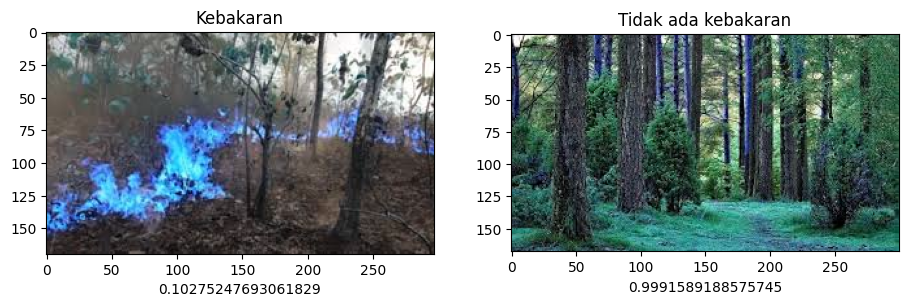

In [185]:
def klasifikasi(yhat):
    if yhat > 0.5: 
        return(f'Tidak ada kebakaran')
    else:
        return(f'Kebakaran')
hasil1 = klasifikasi(yhat1)
hasil2 = klasifikasi(yhat2)

plt.subplot(2,2,1)
plt.title(hasil1)
plt.xlabel(float(yhat1))
plt.imshow(img1)

plt.subplot(2,2,2)
plt.title(hasil2)
plt.xlabel(float(yhat2))
plt.imshow(img2)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
plt.show()

Semakin tinggi nilai epoksi , semakin besar akurasi yang dimiliki model untuk setiap iterasi berikutnya